In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/drive/MyDrive/DA Project datasets/screen_time_app_usage_dataset.csv"
df = pd.read_csv(file_path)

# Show first rows
df.head()


,user_id,date,app_name,category,screen_time_min,launches,interactions,is_productive,youtube_views,youtube_likes,...,extra_col_14,extra_col_15,extra_col_16,extra_col_17,extra_col_18,extra_col_19,extra_col_20,extra_col_21,extra_col_22,extra_col_23
0,1051,2024-01-01 00:00:00.000000000,Camera,Utilities,24.53,2,7,False,NaN,NaN,...,33.43,49.03,64.74,49.49,47.64,38.34,39.56,49.14,62.18,55.91
1,1088,2024-01-01 00:43:41.673891297,Chrome,Utilities,19.78,3,2,False,NaN,NaN,...,44.06,49.40,66.63,62.10,47.64,51.88,42.35,55.86,45.96,46.69
2,1052,2024-01-01 01:27:23.347782594,Spotify,Entertainment,32.03,1,6,False,NaN,NaN,...,55.18,41.87,54.84,65.59,61.28,49.51,41.11,55.53,44.13,71.01
3,1028,2024-01-01 02:11:05.021673891,Google Maps,Utilities,19.10,2,5,False,NaN,NaN,...,59.39,47.87,54.68,56.14,63.98,46.75,46.98,40.15,48.11,50.09
4,1034,2024-01-01 02:54:46.695565188,Instagram,Social,25.19,1,5,False,NaN,NaN,...,51.58,60.38,51.23,44.38,52.71,58.19,37.47,55.64,51.60,37.37


In [ ]:
# Drop irrelevant extra columns
df = df.drop(columns=[col for col in df.columns if "extra_col" in col])

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Quick check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           3000 non-null   int64         
 1   date              3000 non-null   datetime64[ns]
 2   app_name          3000 non-null   object        
 3   category          3000 non-null   object        
 4   screen_time_min   3000 non-null   float64       
 5   launches          3000 non-null   int64         
 6   interactions      3000 non-null   int64         
 7   is_productive     3000 non-null   bool          
 8   youtube_views     142 non-null    float64       
 9   youtube_likes     142 non-null    float64       
 10  youtube_comments  142 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 237.4+ KB


In [ ]:
# Summary of key numeric columns
print(df[['screen_time_min', 'launches', 'interactions']].describe())

# Category counts
print(df['category'].value_counts().head(10))

# Average screen time by category
print(df.groupby('category')['screen_time_min'].mean().sort_values(ascending=False).head(10))


       screen_time_min     launches  interactions
count      3000.000000  3000.000000   3000.000000
mean         29.902057     1.993333      4.962000
std          30.561599     1.403547      2.223257
min           0.010000     0.000000      0.000000
25%           8.617500     1.000000      3.000000
50%          20.585000     2.000000      5.000000
75%          40.415000     3.000000      6.000000
max         218.390000     9.000000     13.000000
category
Social           763
Utilities        755
Productivity     753
Entertainment    729
Name: count, dtype: int64
category
Social           31.131429
Entertainment    29.984513
Productivity     29.592430
Utilities        28.888848
Name: screen_time_min, dtype: float64


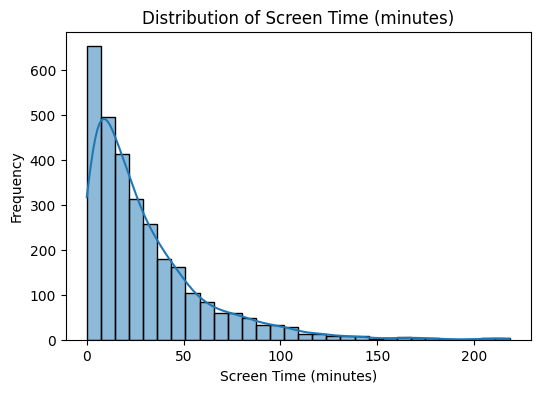

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['screen_time_min'], bins=30, kde=True)
plt.title("Distribution of Screen Time (minutes)")
plt.xlabel("Screen Time (minutes)")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-3610597944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")


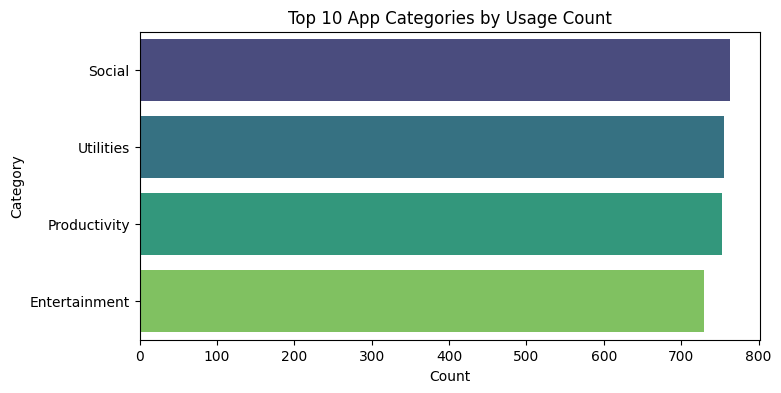

In [ ]:
plt.figure(figsize=(8,4))
category_counts = df['category'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title("Top 10 App Categories by Usage Count")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


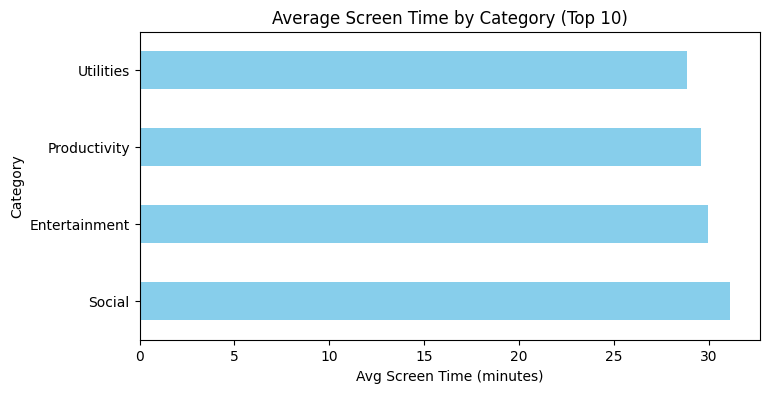

In [ ]:
plt.figure(figsize=(8,4))
avg_screen_time_category = df.groupby('category')['screen_time_min'].mean().sort_values(ascending=False)
avg_screen_time_category.head(10).plot(kind='barh', color='skyblue')
plt.title("Average Screen Time by Category (Top 10)")
plt.xlabel("Avg Screen Time (minutes)")
plt.ylabel("Category")
plt.show()


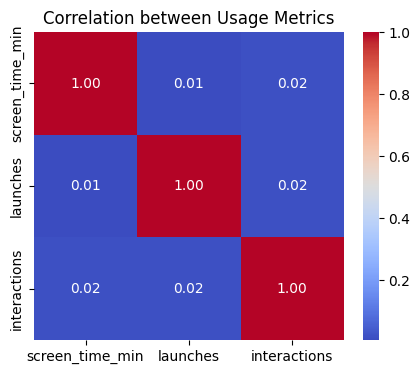

In [ ]:
plt.figure(figsize=(5,4))
corr_matrix = df[['screen_time_min', 'launches', 'interactions']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Usage Metrics")
plt.show()



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aggregate data at user level
user_data = df.groupby('user_id').agg({
    'screen_time_min': 'mean',
    'launches': 'mean',
    'interactions': 'mean'
}).reset_index()

# Standardize features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_data[['screen_time_min', 'launches', 'interactions']])


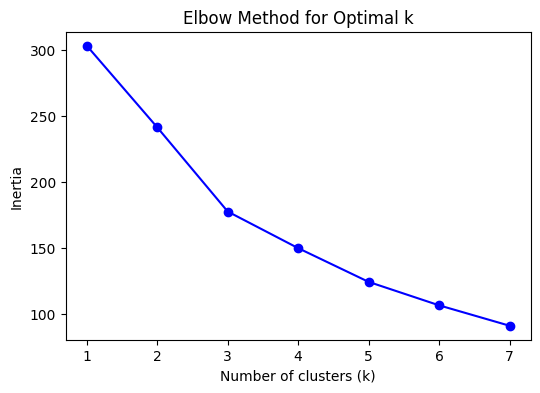

In [ ]:
inertia = []
K = range(1, 8)  # test 1 to 7 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Fit K-means
kmeans = KMeans(n_clusters=4, random_state=42)
user_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Inspect cluster counts
print(user_data['Cluster'].value_counts())


Cluster
2    35
0    31
3    23
1    12
Name: count, dtype: int64


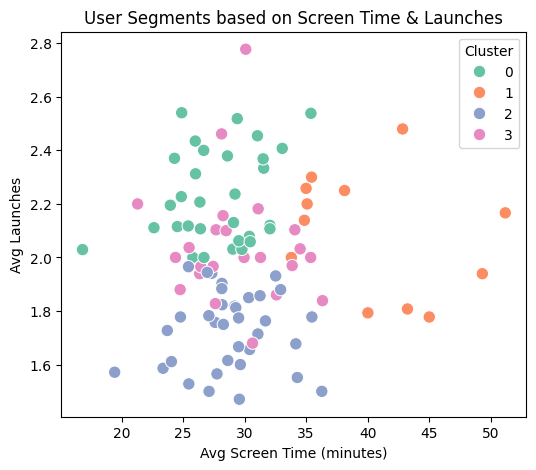

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=user_data['screen_time_min'], y=user_data['launches'],
                hue=user_data['Cluster'], palette='Set2', s=80)
plt.title("User Segments based on Screen Time & Launches")
plt.xlabel("Avg Screen Time (minutes)")
plt.ylabel("Avg Launches")
plt.legend(title="Cluster")
plt.show()


In [ ]:
# Merge cluster labels back with main df
df_with_clusters = df.merge(user_data[['user_id','Cluster']], on='user_id')

# Save to CSV for Tableau
df_with_clusters.to_csv("segmented_users.csv", index=False)

print("Segmented dataset saved as segmented_users.csv")


Segmented dataset saved as segmented_users.csv


In [ ]:
# Aggregate at user level for clustering
user_data = df_clean.groupby('user_id').agg({
    'screen_time_min': 'mean',
    'launches': 'mean',
    'interactions': 'mean'
}).reset_index()

user_data.head()
